# Summary

This lab will guide you through most of the steps - and pitfalls - of interval velocity estimation, perhaps the most important problem in exploration seismology. You will apply a least squares slowness scan, and then pick RMS slowness using an auto-picker. You will then solve the Dix equation as a least squares problem. Finally, you will test the effects of using regularization and weighting on the Dix inversion.

# Introduction
Exploration seismologists transmit waves through the Earth's surface and record their corresponding traveltimes. In oversimplified terms, the traveltime is the path integral of the interval slowness (1/velocity) over the raypath between source and receiver. "Inversion" of the traveltime for the underlying velocity field is perhaps the most important problem in our branch of geophysics.

Under suitable assumptions, we can directly estimate root-mean-square (RMS) velocity from multioffset seismic data. You have seen the theory in *Basic Earth Imaging* and experimented with it in Lab 2 of this course. However, in order to justify our salaries, we geophysicists must go beyond RMS velocity, and estimate a field of interval velocities, which is needed for seismic depth conversion.


For a stratified ($v(z)$) earth, we can easily write the relationship between RMS velocity ($V$) and interval velocity ($v$):

\begin{equation}\label{eq:vrms}
	V^2(\tau) = \frac{1}{\tau}\ \sum_i v^2_i \Delta\tau_i \qquad (1)
\end{equation}

We say "easily" because the above relationship is implied by the words *root-mean-square*. Equation (1) has an analytic inverse, known as the Dix equation:
\begin{equation}\label{eq:dix}
	v_k^2 = \frac{ \tau_k V_k^2 - \tau_{k-1} V_{k-1}^2 }{ \tau_k - \tau_{k-1} } \qquad (2)
\end{equation}
For a detailed derivation, please see *Basic Earth Imaging*. In practice, the Dix equation often fails to produce a pleasing result, particularly in regions of complex stratigraphy.

In this lab, you will use your expertise in optimization to cast the Dix equation as a least squares problem, in order to more robustly estimate an interval velocity function from a marine CMP gather.


# Your assignment

In this lab, we will work with a CMP gather shown in the Figure below. There are three parts to this lab. First, you will compute a slowness scan using the NMO operator (similar to Lab 2). Second, you will pick the RMS slowness from these scans using a picking program and convert them to RMS velocity. Finally, you will do a Dix inversion of the RMS velocity to convert it to interval velocity. 


In this lab you will use your slowness operator from Lab 2 and we have provided the regularization operators as well as helper functions that will help you to mute (if you find it necessary) and pick the slowness scans. These functions and operators are complete and do not need modification. 

The final part of this lab asks you to perform a weighted, regularized optimization. There are several ways in which you could do this and we have provided you a starter Problem class that can help you with this. If you desire to use this class, you will need to modify it in order to use it for the inversion.

WARNING! DATAPATH not found. The folder /tmp will be used to write binary files


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
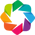

:Image   [x,y]   (z)

In [1]:
import genericIO
import Grey

# Read in the data
dat = genericIO.defaultIO.getVector("lab4_cmp0.H")
# Get axes
taxis = dat.getHyper().getAxis(1)
xaxis = dat.getHyper().getAxis(2)
nt = taxis.n; ot = taxis.o; dt = taxis.d
nx = xaxis.n; ox = xaxis.o; dx = xaxis.d

grey=Grey.plot(dat,label1="Time (s)",label2="Offset (km)",bclip=-5.0e06,eclip=5.0e06,height=700,width=300,invert_yaxis=True)
grey.image()

In [2]:
x = dat.getNdArray()
print(x[0].shape)

(1000,)


## Slowness scan optimization

1. Use your NMO operator from Lab2 and estimate the slowness scan by an adjoint only. Plot the scan and comment on its quality and artifacts (if they exist). (Note: you can use the function mute for muting the refractions and direct arrival in the data which can help reduce artifacts. Also, you should compute the envelope of your scan (using the envelope function) before viewing. Both of these functions can be found within the file ``lab4helper.py``).

In [3]:
def mute(t,x,tp=0.15,slope0=1/1.45,slopep=1/1.45):
    """ 
    Designs a mute function for a particular offset.
    Loop over all offsets to get a mute for the whole gather
    This mute function can then be multiplied with the gather to mute
    unwanted events

    Parameters:
      tp:     controls the smoothness of the taper of the mute function (large is smoother) [0.15]
      slope0: controls the slope of the mute function [1.45 km/s (water velocity)]
      slopep: controls the slope and also the smoothness of the taper [1.45 km/s]
    """
    nt = len(t)
    wt = np.zeros(nt) #1D 
    tx = np.abs(x)
    idx = t < tx*slope0
    wt[idx] = 0; wt[~idx] = 1 
    idx2 = (wt == 1) & (t <= tp + tx*slopep)
    wt[idx2] = np.sin((np.pi/2)*(t[idx2]-tx*slope0)/(tp+tx*(slopep-slope0)))**2

    return wt

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import giee, Hypercube
from lab4helper import envelope
import nmo
import nmo_vel

In [5]:
axT=dat.getHyper().getAxis(1)
axS=Hypercube.axis(n=64,o=.2,d=.013,label="slowness")
slowV=giee.vector(Hypercube.hypercube(axes=[axT,axS]))
slowV_mod= slowV.getNdArray()
data = dat.getNdArray()

# make your nmo operator
## imported above
# Build the mute function
## imported above    
# Mute the data

#dat_vector = giee.vector(genericIO.defaultIO.getVector("lab4_cmp0.H"))
mute_wt=giee.vector(Hypercube.hypercube(ns=[nx,nt], ds=[dx,dt],os=[ox,ot]))
dat_wt=giee.vector(Hypercube.hypercube(ns=[nx,nt], ds=[dx,dt],os=[ox,ot]))
t = []
x = []
for i in range(nt):
    t.append(ot + i*dt)
for i in range(nx):
    x.append(ox + i*dx) 
t =np.array(t)
x = np.array(x) #tried this, errored out on different sizes on comparison line

for ix in np.arange(nx):
    wt = mute(t, x[ix], slope0=0.7, slopep=0.7)
    data[ix,:] = data[ix,:] * wt
# Plot the muted data
grey1=Grey.plot(dat,label1="t",label2="x",bclip=-5.0e06,eclip=5.0e06,height=700,width=300,invert_yaxis=True)
grey1.image()

:Image   [x,y]   (z)

In [6]:
# Construct the nmo operator
## imported above
# Apply the adjoint
slow = nmo.slow(slowV,dat) #  64,1000
op_nmo = slow.adjoint(False, slowV, dat)
slowV_smooth = envelope(slowV,10)
# plot the slowness profile
grey2=Grey.plot(slowV_smooth,label1="z",label2="Slowness (1/v)",height=700,width=300,invert_yaxis=True,cmap='jet')
grey2.image()

/opt/hub/users/jdstitt/GP211/Lab4/lab4helper.py:57: ComplexWarning: Casting complex values to real discards the imaginary part
  bot[i2,i1]=np.conj(cdata[i2,i1])*cdata[i2,i1]


:Image   [x,y]   (z)

Comments on Plot: Looking at the plot above based on the adjoint calculation, it is nice to see that many of the reflections in the transformed space are not faded and show a consistently high amplitude across the spectrum. I do see a bit of the higher coherence very faintly along a slightly slanted middle track as a function of slowness. This will help us to compute RMS velocity later on. Furthermore, you see some artifacts of crossing reflections on the bottom and some parts of the middle of the image. These come from high amplitude anomlies from the (x,t) space and once converted into the slowness space, produce these ellipsoidal artifacts.

In [7]:
#dat_vector = giee.vector(genericIO.defaultIO.getVector("lab4_cmp0.H"))

2. With all the experience you have from previous labs, you know that you can do better than an adjoint. Perform a least-squares optimization to compute the slowness scan using a only a data-fitting term. Plot your results. Do they appear to be better? Why?

For the plot below, the results seem to be worse in more areas than better. The reason I say this is because with our data fitting procedure, we seem to lose a lot of energy at the nearest offset reflections (flatter layers near the top) as well as having a lot more roughening and aliasing effects between different layers near the deeper sections of the seismic image. I believe this is due to the unstablization in some of the high velocity contrasts?

In [8]:
import pyProblem, pyLinearSolver, pyStopper

# using the nmo operator setup a problem, stopper, and solver
slowV.zero()
probcg = pyProblem.ProblemL2Linear(slowV,dat,slow)
niterStopper = pyStopper.BasicStopper(niter=100) #20
cg = pyLinearSolver.LCGsolver(niterStopper,steepest=False)
# Run the inversion and get the model
cg.run(probcg,verbose=True)
cgOut = probcg.model
cg_smooth = envelope(cgOut,20)
# plot the inverted slowness result
grey=Grey.plot(cg_smooth,label1="z",label2="s",height=700,width=500,invert_yaxis=True,colorbar=True, cmap='jet')
grey.image()

##########################################################################################
				LINEAR CONJUGATE GRADIENT  SOLVER
	Restart folder: /tmp/restart_2022-02-23T05-15-12.913739/
	Modeling Operator:		Operator
##########################################################################################

iter = 000, obj = 1.87977e+16, resnorm = 1.94e+08, gradnorm = 1.71e+09, feval = 2
iter = 001, obj = 5.08055e+15, resnorm = 1.01e+08, gradnorm = 8.74e+08, feval = 4
iter = 002, obj = 2.62942e+15, resnorm = 7.25e+07, gradnorm = 7.60e+08, feval = 6
iter = 003, obj = 2.19313e+15, resnorm = 6.62e+07, gradnorm = 7.74e+08, feval = 8
iter = 004, obj = 1.72696e+15, resnorm = 5.88e+07, gradnorm = 4.51e+08, feval = 10
iter = 005, obj = 1.42523e+15, resnorm = 5.34e+07, gradnorm = 4.82e+08, feval = 12
iter = 006, obj = 1.20056e+15, resnorm = 4.90e+07, gradnorm = 4.19e+08, feval = 14
iter = 007, obj = 1.03474e+15, resnorm = 4.55e+07, gradnorm = 3.14e+08, feval = 16
iter = 008, obj = 9.29928e+14, 

iter = 097, obj = 2.54100e+14, resnorm = 2.25e+07, gradnorm = 2.62e+07, feval = 196
iter = 098, obj = 2.52966e+14, resnorm = 2.25e+07, gradnorm = 1.93e+07, feval = 198
iter = 099, obj = 2.51934e+14, resnorm = 2.24e+07, gradnorm = 2.30e+07, feval = 200
iter = 100, obj = 2.51104e+14, resnorm = 2.24e+07, gradnorm = 2.08e+07, feval = 202
Terminate: maximum number of iterations reached

##########################################################################################
				LINEAR CONJUGATE GRADIENT SOLVER end
##########################################################################################



/opt/hub/users/jdstitt/GP211/Lab4/lab4helper.py:57: ComplexWarning: Casting complex values to real discards the imaginary part
  bot[i2,i1]=np.conj(cdata[i2,i1])*cdata[i2,i1]


:Image   [x,y]   (z)

3. If you looked at the previous results and thought that regularization is needed, you are right. Redo the previous question but now with a regularization term as well. Feel free to try and experiment with the different regularizations (e.g., identity, gradient, Laplacian, etc.) and values for epsilon. Which regularization seemed to give you the best result? Plot your results and comment on the effects of regularization. 

In [9]:
type(dat)

SepVector.floatVector

In [10]:
axT=dat.getHyper().getAxis(1)
axS=Hypercube.axis(n=64,o=.2,d=.013,label="slowness")
slowV=giee.vector(Hypercube.hypercube(axes=[axT,axS]))

In [11]:
from Identity import identity
from Igrad import igrad2
from Laplacian import laplacian
import copy
slowV.zero()

axs=copy.deepcopy(dat.getHyper().axes)
dtmp=giee.vector(Hypercube.hypercube(axes=axs), arr=dat.getNdArray())
print(type(slowV))
#dtmp.naxis[0]

<class 'giee.vector'>


In [17]:
# initialize one of the reglarization operators 

Igradop = igrad2(slowV, dtmp)
# Igradop = identity(slowV, dtmp)

64
24


Exception: Fast axis of model and data don't match

In [ ]:
# using the nmo operator and regularization operator setup a problem, stopper, and solver
eps = 0.01
reg_problem=pyProblem.ProblemL2LinearReg(slowV,dat,slow,eps,reg_op=Igradop)
problemStop=pyStopper.BasicStopper(niter=40)
solve=pyLinearSolver.LCGsolver(problemStop)
solve.setDefaults(save_model=True)
# Run the inversion and get the model
solve.run(reg_problem,verbose=True)
modelOut=reg_problem.model
# plot the inverted slowness result
grey=Grey.plot(modelOut,label1="z",label2="s",height=700,width=500,invert_yaxis=True,colorbar=True,cmap='jet')
grey.image()

## Slowness RMS Picking

In [ ]:
help(grey)

In [ ]:
#slowEnv = envelope(slowV,11,4)
slowEnv = envelope(slowV,5)
grey=Grey.plot(slowEnv,label1="sec",label2="slowness", height=700,width=500,invert_yaxis=True,colorbar=True)
grey.image()

Now that you managed to produce a nice and clean slowness scan, we want to use it to pick the RMS slownesss. We can use the picker function within ``lab4helper.py`` to do the picking for you. This program picks the maximum of the function within an upper and lower bound. The bounds are computed via

\begin{equation}
  s_{\text{bound}}(\tau) = s_0 + a\tau + b\sqrt{\tau} \pm e
\end{equation}

where $s_0$ defines an intercept of the bound, $a$ and $b$ are parameters that control the slope of the bound and $e$ controls the width of the bounds. The parameters $s_0$, $a$, $b$ and $e$ need to be supplied to the function picker so it can compute the bounds. The picker function will then have four outputs: the slowness function within the bounds, the picked RMS slowness, the times of the picked slowness and finally the amplitudes associated with the picked slownesses.

4. Adjust the bounds parameters until you are happy with the picks. What are the values of the parameters? Convert the picks from slowness to velocity and plot your result.

In [ ]:
from lab4helper import picker

# use the picker function, adjusting the bounds as you need to, to pick rms slowness
envClip,tms,slowR,amp=picker(.60,-.08,0.05,10.,slowEnv)
grey1=Grey.plot(envClip,label1="sec",label2="slowness", height=700,width=500,invert_yaxis=True,colorbar=True)
#grey1=Grey.plot(slowR.getNdArray(),label1="sec",label2="slowness", height=700,width=500,invert_yaxis=True,colorbar=True)
plt.plot(slowR.getNdArray(), tms, zorder=2)
grey1.image()
# convert to velocity 

# plot 

5. Write a program which applies an NMO correction to the CMP gather using the picked RMS slowness. Run this program using the auto-picked RMS slowness and plot your results. Are all the events flat? How well did the picker do?

In [10]:

def adjnull(adj, add, model_sepVec, data_sepVec):
    if(add==0):
        if(adj): 
            model_sepVec.set(0.)
        else:    
            data_sepVec.set(0.)
            
def NMO(adj,add,model_sepVec,data_sepVec,vel_sepVec):
    """
    Function to perform forward or adjoint Normal Moveout (NMO) on a 2d cmp gather
            adj                       - boolean; Flag to perform forward or adjoint
            add                       - boolean; Flag to add to model/data space or zero it 
            model_sepVec              - sepVector; 2d model space. CMP gather 
            model_sepVec              - sepVector; 2d data space. NMOed CMP gather 
            vel_sepVec                - sepVector; 1d RMS velocity profile
    """
    n_off = model_sepVec.getHyper().getAxis(2).n
    d_off = model_sepVec.getHyper().getAxis(2).d
    o_off = model_sepVec.getHyper().getAxis(2).o
    n_tau = model_sepVec.getHyper().getAxis(1).n
    d_tau = model_sepVec.getHyper().getAxis(1).d
    o_tau = model_sepVec.getHyper().getAxis(1).o 
    d_t = data_sepVec.getHyper().getAxis(1).d
    o_t = data_sepVec.getHyper().getAxis(1).o
    
    adjnull(adj, add, model_sepVec, data_sepVec)
    
    for i_off in np.arange(n_off):
        off = o_off + d_off * i_off
        for i_tau in np.arange(n_tau):
            tau = o_tau + d_tau * i_tau
            xs = off/vel_sepVec[i_tau]
            tt = np.sqrt(tau*tau + xs*xs)
            i_tt = int(0.5 + (tt-o_t)/d_t) 
            if(i_tt < n_tau):
                if(adj==0):
                    data_sepVec.getNdArray()[i_off,i_tt] += model_sepVec.getNdArray()[i_off,i_tau]
                else:
                    model_sepVec.getNdArray()[i_off,i_tau] += data_sepVec.getNdArray()[i_off,i_tt]
    return data_sepVec, model_sepVec


In [11]:
# write an operator that to applies the nmo correction to a cmp gather
# Apply NMO correction with the picked Vrms

velV=slowR.clone()
slow=slowR.getNdArray()
vel=np.array(slow)
for i in range(velV.getHyper().getAxis(1).n):
    vel[i]=1./slow[i]
nmoed=dat.clone()
print(type(nmoed.getNdArray()))
nmoOp=nmo_vel.slow(nmoed,dat)
nmoOp.adjoint(False,nmoed,dat,vel)
plt.figure(figsize=(4,8))
grey1=Grey.plot(nmoed,label1="sec",label2="slowness", height=700,width=500,invert_yaxis=True,colorbar=True)
grey1.image()
# Plot the NMO-correctred data

<class 'numpy.ndarray'>


:Image   [x,y]   (z)

<Figure size 288x576 with 0 Axes>

## Dix Optimization

6. Before we setup a least-squares optimization, let's try using the Dix equations directly. Write a function that computes the interval velocity using the Dix equation. Run this function on the auto-picked RMS velocity. Plot your results and comment on their accuracy and stability.

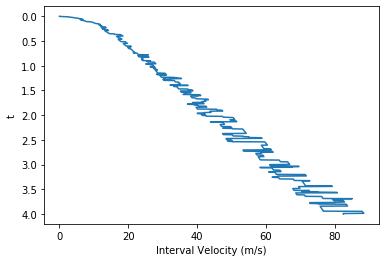

In [12]:
# write a function that directly applies the Dix equation. This computes an interval velocity function from an RMS velocity function """
def int_vel(t, vrms):
    vint_sqr = []
    for i in range(len(vrms)): 
        if i == 0: 
            vint_sqr.append((t[i]*vrms[i]**2)/(t[i]+0.1))
        else:
            vint_sqr.append((t[i]*vrms[i]**2)-(t[i-1]*vrms[i-1]**2)/(t[i]-t[i-1]))
    vint = np.sqrt(np.abs(vint_sqr))
    return vint
# apply the function to the picked rms values to get interval velocity values
interval_velocity = int_vel(tms,vel)
# plot the interval velocity values
plt.plot(interval_velocity,tms,zorder=2)
plt.ylabel('t')
plt.xlabel('Interval Velocity (m/s)')
plt.gca().invert_yaxis()


7. You decide now that using the Dix equation (i.e., the direct inverse) might not be a good idea for auto-picked RMS velocity. Instead you want to setup the interval velocity estimation as a least-squares optimization from equation (1). What is the model space, data space and operator? (Hint: we want the problem to be linear)

> F: Simple Causal Integration Operator

> u: unknown vector model where we want to fill in vector of squared interval velocities

> d: known data and ector of squared RMS velocties

8. Write or use a pre-existing class for the operator you describe in the previous question. Then, run the dot product test on this operator. What are your results?

In [42]:
# hint: what you want is causal integration. implement the operator here
import pyOperator
import pyProblem
import pyVector
import pyStopper
import pyLinearSolver
import giee
from numba import jit, int32, float32
import numpy as np

class caus(pyOperator.Operator):
    """
    causal integration class
    """

    def __init__(self, dom, rng):
        """
        Initialize operator and saves the space of the operator
        """
        if not isinstance(dom,pyVector.vector):
          raise Exception("Expecting domain to be a python vector")

        if not isinstance(rng,pyVector.vector):
          raise Exception("Expecting range to be a python vector")

        # Store the vector space of the domain and range
        super().__init__(dom,rng)
        
    def forward(self,add,modl,data):
        """
        Applies the forward operator:
        Spikes in depth-slowness to hyperbolas in time-space

        Parameters:
          add - boolean whether or not add to the data vector or zero it first
          modl - slowness model (s,z)
          data - hyperbolas (t,x)
        """
        self.checkDomainRange(modl,data)

        # Zero the data if add == false
        if not add:
            data.zero()

        forward_caus(modl.getNdArray(),data.getNdArray())

    def adjoint(self,add,modl,data):
        """
        Applies the adjoint operator:
        Hyperbolas in time-space to spikes in depth-slowness

        Parameters:
          add - boolean whether or not to add the model vector or zero it first
          modl - slowness model (s,z)
          data - hyperbolas (t,x)
        """

        if not add:
            modl.zero()

        adjoint_caus(modl.getNdArray(),data.getNdArray())

####### Please complete the two functions below #######
@jit(nopython=True)
def forward_caus(model, data):
    temp = 0
    for i in range(data.size):
        data[i] += model[i] + temp
        temp = data[i]
        
@jit(nopython=True)
def adjoint_caus(model, data):
    temp = 0
    for i in range(data.size-1,-1,-1):
        model[i] += data[i] + temp
        temp = model[i]

In [62]:
nv = slowR.getHyper().getAxis(1).n
dv = slowR.getHyper().getAxis(1).d
ov = slowR.getHyper().getAxis(1).o
rms=giee.vector(Hypercube.hypercube(ns=[nv], ds=[dv],os=[ov]), arr=vel)
int_vel = giee.vector(Hypercube.hypercube(ns=[nv], ds=[dv],os=[ov]))

# initialize the causal integration operator
causal_op = caus(int_vel,rms)
print(int_vel.shape)
causal_op.adjoint(False,int_vel,rms)

# make sure it passes the dp test
causal_op.dotTest(verbose=True)

(1000,)
Dot-product test of forward and adjoint operators
-------------------------------------------------
Applying forward operator add=False
 Runs in: 2.288818359375e-05 seconds
Applying adjoint operator add=False
 Runs in: 4.172325134277344e-05 seconds
Dot products add=False: domain=3.531981e+01 range=3.531981e+01 
Absolute error: 9.237056e-14
Relative error: 2.615262e-15 

Applying forward operator add=True
 Runs in: 8.106231689453125e-06 seconds
Applying adjoint operator add=True
 Runs in: 7.62939453125e-06 seconds
Dot products add=True: domain=1.051239e+05 range=1.051239e+05 
Absolute error: 1.891749e-10
Relative error: 1.799542e-15 

-------------------------------------------------


In [63]:
# using the nmo operator setup a problem, stopper, and solver
slowV.zero()
probcg = pyProblem.ProblemL2Linear(int_vel,rms,causal_op)
niterStopper = pyStopper.BasicStopper(niter=100) #20
cg = pyLinearSolver.LCGsolver(niterStopper,steepest=False)
# Run the inversion and get the model
cg.run(probcg,verbose=True)
cgOut = probcg.model
# # plot the inverted slowness result
# grey=Grey.plot(cgOut,label1="z",label2="s",height=700,width=500,invert_yaxis=True,colorbar=True)
# grey.image()

##########################################################################################
				LINEAR CONJUGATE GRADIENT  SOLVER
	Restart folder: /tmp/restart_2022-02-22T19-17-15.274137/
	Modeling Operator:		Operator
##########################################################################################

iter = 000, obj = 3.18508e+14, resnorm = 2.52e+07, gradnorm = 1.61e+10, feval = 2
iter = 001, obj = 1.21211e+11, resnorm = 4.92e+05, gradnorm = 1.01e+08, feval = 4
iter = 002, obj = 5.28130e+09, resnorm = 1.03e+05, gradnorm = 1.23e+07, feval = 6
iter = 003, obj = 4.17901e+08, resnorm = 2.89e+04, gradnorm = 2.24e+06, feval = 8
iter = 004, obj = 6.26253e+07, resnorm = 1.12e+04, gradnorm = 6.75e+05, feval = 10
iter = 005, obj = 1.31143e+07, resnorm = 5.12e+03, gradnorm = 2.39e+05, feval = 12
iter = 006, obj = 2.97508e+06, resnorm = 2.44e+03, gradnorm = 8.97e+04, feval = 14
iter = 007, obj = 8.97335e+05, resnorm = 1.34e+03, gradnorm = 4.24e+04, feval = 16
iter = 008, obj = 3.04995e+05, 

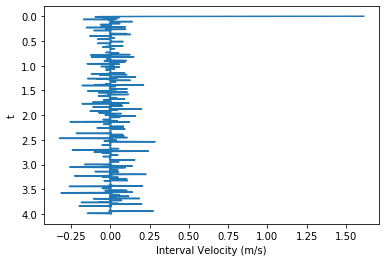

In [64]:
plt.plot(int_vel.getNdArray(),tms,zorder=1)
plt.ylabel('t')
plt.xlabel('Interval Velocity (m/s)')
plt.gca().invert_yaxis()

9. Your experience tells you that we should not use data-fitting optimization only since you already know that the inverse did not work. Therefore, you decide to jump to a regularized optimization right away. Write the necessary code to set up the regularized problem using a regularization operator of your choice. Run the optimization for some iterations and plot the estimated interval velocity (not the model). How well did your optimization do? Why did you get these results?

In [56]:
# hint: you might want to try a 1d gradient opeartor as your regularizer
from Igrad import igrad1
int_vel.zero()
# Build the 1D gradient operator
reg = igrad1(int_vel,rms)
# perform a linear l2 regularized inversion using your operator from question 8 and your regluarizer
eps=1

reg_problem=pyProblem.ProblemL2LinearReg(int_vel,rms,causal_op,eps,reg_op=reg)
problemStop=pyStopper.BasicStopper(niter=400)
solve=pyLinearSolver.LCGsolver(problemStop)
solve.setDefaults(save_model=True)

solve.run(reg_problem,verbose=True)
modelOut=reg_problem.model
# plot the estimated interval velocity 

##########################################################################################
				LINEAR CONJUGATE GRADIENT  SOLVER
	Restart folder: /tmp/restart_2022-02-22T19-12-39.158120/
	Modeling Operator:		 VStack 
##########################################################################################

iter = 000, obj = 2.14230e+03, resnorm = 6.55e+01, gradnorm = 3.97e+04, feval = 2
iter = 001, obj = 1.88911e+02, resnorm = 1.94e+01, gradnorm = 2.59e+03, feval = 4
iter = 002, obj = 9.69081e+01, resnorm = 1.39e+01, gradnorm = 1.04e+03, feval = 6
iter = 003, obj = 5.79092e+01, resnorm = 1.08e+01, gradnorm = 4.96e+02, feval = 8
iter = 004, obj = 3.71405e+01, resnorm = 8.62e+00, gradnorm = 2.77e+02, feval = 10
iter = 005, obj = 2.69411e+01, resnorm = 7.34e+00, gradnorm = 2.06e+02, feval = 12
iter = 006, obj = 2.67227e+01, resnorm = 7.31e+00, gradnorm = 3.62e+02, feval = 14
iter = 007, obj = 2.06505e+01, resnorm = 6.43e+00, gradnorm = 1.18e+02, feval = 16
iter = 008, obj = 1.62468e+01, 

iter = 193, obj = 1.14489e+00, resnorm = 1.51e+00, gradnorm = 2.96e+00, feval = 388
iter = 194, obj = 1.14471e+00, resnorm = 1.51e+00, gradnorm = 1.89e+00, feval = 390
iter = 195, obj = 1.14459e+00, resnorm = 1.51e+00, gradnorm = 6.94e+00, feval = 392
iter = 196, obj = 1.14446e+00, resnorm = 1.51e+00, gradnorm = 1.74e+00, feval = 394
iter = 197, obj = 1.14419e+00, resnorm = 1.51e+00, gradnorm = 2.82e+00, feval = 396
iter = 198, obj = 1.14417e+00, resnorm = 1.51e+00, gradnorm = 2.66e+00, feval = 398
iter = 199, obj = 1.14400e+00, resnorm = 1.51e+00, gradnorm = 3.18e+00, feval = 400
iter = 200, obj = 1.14335e+00, resnorm = 1.51e+00, gradnorm = 6.99e+00, feval = 402
iter = 201, obj = 1.14328e+00, resnorm = 1.51e+00, gradnorm = 2.00e+00, feval = 404
iter = 202, obj = 1.14298e+00, resnorm = 1.51e+00, gradnorm = 2.37e+00, feval = 406
iter = 203, obj = 1.14293e+00, resnorm = 1.51e+00, gradnorm = 5.66e+00, feval = 408
iter = 204, obj = 1.14240e+00, resnorm = 1.51e+00, gradnorm = 2.87e+00, feva

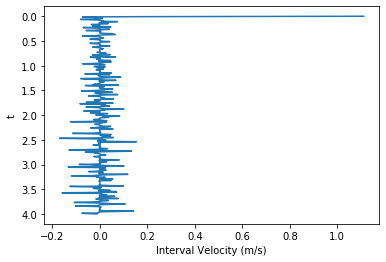

In [57]:
plt.plot(modelOut.getNdArray(),tms,zorder=3)
plt.ylabel('t')
plt.xlabel('Interval Velocity (m/s)')
plt.gca().invert_yaxis()

In [82]:
print(amp)

[5.33227926e+08 4.75744471e+08 4.11528378e+08 3.68408306e+08
 3.23221901e+08 2.76857326e+08 2.17163477e+08 1.61385523e+08
 1.36000333e+08 1.16709757e+08 1.03256106e+08 9.06186099e+07
 8.34496323e+07 7.74912838e+07 7.22382171e+07 6.80067824e+07
 6.72888953e+07 7.16191988e+07 7.23712457e+07 7.27003922e+07
 7.07122631e+07 6.60691719e+07 6.89511229e+07 7.34714897e+07
 7.76567982e+07 7.99754486e+07 8.11688344e+07 8.14501741e+07
 8.30559582e+07 8.27249493e+07 9.03620033e+07 9.91796477e+07
 1.07381117e+08 1.10291689e+08 1.13136450e+08 1.12957016e+08
 1.13303152e+08 1.07889566e+08 1.18296949e+08 1.18285800e+08
 1.10453475e+08 9.96434416e+07 9.41739089e+07 1.03826495e+08
 1.16965683e+08 1.29283843e+08 1.44824275e+08 1.50609583e+08
 1.51949385e+08 1.48289683e+08 1.45745652e+08 1.55636456e+08
 1.56159750e+08 1.54060667e+08 1.65884614e+08 1.86916978e+08
 1.99191458e+08 2.05414162e+08 2.48384032e+08 2.77645962e+08
 2.99914613e+08 3.10020059e+08 3.00530691e+08 2.80633890e+08
 2.51614886e+08 2.436224

10. You remember now that your auto-picker also had the amplitudes of the scan as an output and you decide to use these values to weight the data-fitting equation. Using the weight operator class, construct a weight operator with with these values. Then, run another optimization that applies a weighting operator to the data fitting term. You will also want to maintain the regularization term. Run the optimization for some iterations and plot the estimated interval velocity. Did these weights improve the optimization? (**Note**: there are several ways in which you could implement this. One way would be to create a new problem class which we have started for you in the file ``ProblemL2LinearRegWgt.py``.)

In [89]:
# build your weighting operator 
class weight(pyOperator.Operator):
    """
    diagonal weighting operator
    """

    def __init__(self, dom, rng):
        """
        Initialize operator and saves the space of the operator
        """
        if not isinstance(dom,pyVector.vector):
          raise Exception("Expecting domain to be a python vector")

        if not isinstance(rng,pyVector.vector):
          raise Exception("Expecting range to be a python vector")

        # Store the vector space of the domain and range
        super().__init__(dom,rng)

    def forward(self,add,modl,data,coef):
        """
        Applies the forward operator:
        Spikes in depth-slowness to hyperbolas in time-space

        Parameters:
          add - boolean whether or not add to the data vector or zero it first
          modl - slowness model (s,z)
          data - hyperbolas (t,x)
        """
        self.checkDomainRange(modl,data)

        # Zero the data if add == false
        if not add:
            data.zero()

        forward_caus(modl.getNdArray(),data.getNdArray(),coef)

    def adjoint(self,add,modl,data,coef):
        """
        Applies the adjoint operator:
        Hyperbolas in time-space to spikes in depth-slowness

        Parameters:
          add - boolean whether or not to add the model vector or zero it first
          modl - slowness model (s,z)
          data - hyperbolas (t,x)
        """

        if not add:
            modl.zero()

        adjoint_caus(modl.getNdArray(),data.getNdArray(),coef)

@jit(nopython=True)
def forward_caus(model, data, coef):
    for i in range(data.size):
        data[i] += model[i]*coef[i]
        
@jit(nopython=True)
def adjoint_caus(model, data, coef):
    for i in range(data.size-1,-1,-1):
        model[i] += data[i]*coef[i]
        
        

In [94]:
import ProblemL2LinearRegWgt
int_vel.zero()
# Build the 1D gradient operator
w = weight(int_vel,rms)
# perform a weighted linear l2 regularized inversion using your operator from question 8, your regluarizer,
eps=0.1
reg_weight_problem = ProblemL2LinearRegWgt(int_vel, rms, causal_op, eps, wgt_op=w, reg_op=reg)
problemStop=pyStopper.BasicStopper(niter=400)
solve=pyLinearSolver.LCGsolver(problemStop)
solve.setDefaults(save_model=True)

solve.run(reg_weight_problem,verbose=True)
modelOut=reg_weight_problem.model
# and your weighting operator
# where do i insert the weigting operator into the python function?
# plot the estimated interval velocity 

TypeError: 'module' object is not callable

## Extra credit

1. Does picking the maximum of the velocity scan really give the RMS velocity? If not, what is the difference between the RMS velocity and what is being measured?

2. Why is using the Dix equation not stable?

3. If you were doing the interval velocity estimation for a whole survey with several CMPs, would constrain the Dix optimization any differently? Why?